In [11]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [17]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2021_altın_mudahale/train.csv', encoding='latin-1')

In [18]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,6000,"âºchase freedom 5x: activate q1 2022, finish ...",0.000000,0.00,Neutral
1,6001,card-as-a-service companies provide comprehens...,0.000000,0.00,Neutral
2,6002,ðð³the deserve edu mastercard credit card...,0.166667,0.20,Positive
3,6003,$smme news: smartmetric reveals 60% existing c...,0.750000,0.25,Positive
4,6004,i'm happy quoted piece sharing insights (and d...,1.000000,0.80,Positive


In [19]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2021_altın_mudahale/test.csv', encoding='latin-1')

In [20]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,"50,000 finnish industrial workers threaten str...",0.000000,0.000000,Neutral
1,1,happened btc$100k eoy ð¤·ââï¸ reminds fo...,0.000000,0.000000,Neutral
2,2,plop supercooled ice ð¦ copper gold swimming...,0.400000,-0.150000,Negative
3,3,jp morgan turns bearish anything-- especially ...,1.000000,0.000000,Neutral
4,4,2021 year clean energy finally faced mining pr...,0.679451,0.157656,Positive


In [21]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [22]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [23]:
# Building model with transformer
model_name = 'google/electra-small-discriminator'

trans = text.Transformer(model_name, maxlen=128)

In [24]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 39
	99percentile : 41


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 16
	95percentile : 35
	99percentile : 43


In [25]:
# getting electra-base model.
model = trans.get_classifier()

In [26]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

In [27]:
history = learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
183/183 [==============================] - 966s 5s/step - loss: 0.7535 - accuracy: 0.7766 - val_loss: 0.6868 - val_accuracy: 0.7450
Epoch 2/5
183/183 [==============================] - 941s 5s/step - loss: 0.2142 - accuracy: 0.9426 - val_loss: 1.4538 - val_accuracy: 0.6540
Epoch 3/5
183/183 [==============================] - 939s 5s/step - loss: 0.0988 - accuracy: 0.9740 - val_loss: 0.9102 - val_accuracy: 0.7318
Epoch 4/5
183/183 [==============================] - 942s 5s/step - loss: 0.0361 - accuracy: 0.9911 - val_loss: 0.9802 - val_accuracy: 0.7503
Epoch 5/5
183/183 [==============================] - 950s 5s/step - loss: 0.0294 - accuracy: 0.9932 - val_loss: 0.8505 - val_accuracy: 0.7860


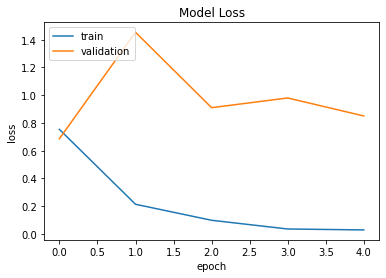

In [28]:
learner.plot('loss')

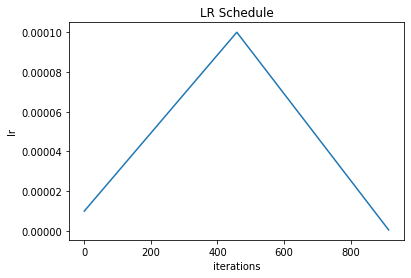

In [29]:
learner.plot('lr')

In [30]:
learner.validate()

188/188 [==============================] - 363s 2s/step
              precision    recall  f1-score   support

           0       0.39      0.13      0.20       725
           1       0.82      0.93      0.87      3349
           2       0.77      0.79      0.78      1926

    accuracy                           0.79      6000
   macro avg       0.66      0.61      0.61      6000
weighted avg       0.75      0.79      0.76      6000



array([[  95,  365,  265],
       [  58, 3109,  182],
       [  89,  325, 1512]])